**Speech emotion Recognition**

 Datasets used in this project:

 1. Crowd sourced emotional Multimodal Actors Dataset (Crema-D)

 2. Ryerson Audio-Visual Database of Emotional Speech and Song(Ravdess)

 3. Surrey Audio-Visual Expressed Emotion,

 4. Toronto emotional speech set.

 **Importing Libraries**


In [39]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Data Preparation**



*   As we are working with four different datasets, so we will be creating a dataframe storing all emotions of the data in dataframe with their paths.

*   We will use this dataframe to extract features for our model.

Now we will use the Kaggle API to download the dataset to the system. First, we will require the API key. To do this just navigate to the profile section in Kaggle and download the JSON file containing your details for API, after that just upload this to colab or locate in the local Jupyter environment.



In [ ]:
# Install Kaggle Module
! pip install Kaggle

In [ ]:
# Upload API details of json file to Colab
from google.colab import files
files.upload()

{}

In [2]:
# creating Kaggle directory and moving the json files there
! mkdir ~/.kaggle
! mv ~/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat '/root/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
# Download the dataset
! kaggle datasets download -d ejlok1/cremad
! kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
! kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 98% 441M/451M [00:03<00:00, 123MB/s]
100% 451M/451M [00:03<00:00, 137MB/s]
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 427M/429M [00:06<00:00, 87.9MB/s]
100% 429M/429M [00:07<00:00, 64.2MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 87% 94.0M/107M [00:00<00:00, 116MB/s] 
100% 107M/107M [00:00<00:00, 116MB/s] 
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 96% 412M/428M [00:03<00:00, 191MB/s]
100% 428M/428M [00:03<00:00, 132MB/s]


Now we unzip the dataset into the desired folder.

In [3]:
! unzip cremad.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: /content/data/AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: /content/data/AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: /content/data/AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: /content/data/AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: /content/data/AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: /content/data/AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: /content/data/AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: /content/data/AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: /content/data/AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: /content/data/AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: /content/data/AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: /content/data/AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: /content/data/AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: /content/data/AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: /content/data/AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: /content

In [7]:
! unzip ravdess-emotional-speech-audio.zip -d /content/data2

Archive:  ravdess-emotional-speech-audio.zip
  inflating: /content/data2/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/data2/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/data2/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/data2/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/data2/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/data2/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /content/data2/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: /content/data2/Actor_01/03-01-03-01-02-01-01.w

In [8]:
! unzip surrey-audiovisual-expressed-emotion-savee.zip -d /content/data3

Archive:  surrey-audiovisual-expressed-emotion-savee.zip
  inflating: /content/data3/ALL/DC_a01.wav  
  inflating: /content/data3/ALL/DC_a02.wav  
  inflating: /content/data3/ALL/DC_a03.wav  
  inflating: /content/data3/ALL/DC_a04.wav  
  inflating: /content/data3/ALL/DC_a05.wav  
  inflating: /content/data3/ALL/DC_a06.wav  
  inflating: /content/data3/ALL/DC_a07.wav  
  inflating: /content/data3/ALL/DC_a08.wav  
  inflating: /content/data3/ALL/DC_a09.wav  
  inflating: /content/data3/ALL/DC_a10.wav  
  inflating: /content/data3/ALL/DC_a11.wav  
  inflating: /content/data3/ALL/DC_a12.wav  
  inflating: /content/data3/ALL/DC_a13.wav  
  inflating: /content/data3/ALL/DC_a14.wav  
  inflating: /content/data3/ALL/DC_a15.wav  
  inflating: /content/data3/ALL/DC_d01.wav  
  inflating: /content/data3/ALL/DC_d02.wav  
  inflating: /content/data3/ALL/DC_d03.wav  
  inflating: /content/data3/ALL/DC_d04.wav  
  inflating: /content/data3/ALL/DC_d05.wav  
  inflating: /content/data3/ALL/DC_d06.wav 

In [4]:
! unzip toronto-emotional-speech-set-tess.zip -d /content/data4

Streaming output truncated to the last 5000 lines.
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/data4/TESS Toronto emotional speech set data/OA

In [9]:
# Paths for data

Ravdess = "/content/data2/audio_speech_actors_01-24"
Crema = "/content/data/AudioWAV"
Tess = "/content/data4/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/content/data3/ALL"

**1. Ravdess Dataframe**

Here is the filename identifiers as per the official RAVDESS website:


*   Modality(01 = full-AV, 02 = video-only, 03= audio-only)
*   Vocal channel (01 = speech, 02 = song).

*  Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

*  Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

*  Repetition (01 = 1st repetition, 02 = 2nd repetition).

*  Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename 02-01-06-01-02-01-12.mp4. This means the meta data for the audio file is:

*  Video-only(02)
*  Speech(01)
*  Fearful(06)
*  Normal Intensity(01)
*  Statement "dogs" (02)
*  1st Repetition (01)
* 12th Actor(12) - Female (as the actor ID number is even).



In [10]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(Ravdess, dir)) # Use os.path.join to create correct path
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess, dir, file))

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

<ipython-input-10-e0a442c147e6>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotions                                               Path
0   disgust  /content/data2/audio_speech_actors_01-24/Actor...
1      calm  /content/data2/audio_speech_actors_01-24/Actor...
2   neutral  /content/data2/audio_speech_actors_01-24/Actor...
3  surprise  /content/data2/audio_speech_actors_01-24/Actor...
4      fear  /content/data2/audio_speech_actors_01-24/Actor...

**2. Crema DataFrame**

In [11]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                       Path
0  disgust  /content/data/AudioWAV1086_DFA_DIS_XX.wav
1      sad  /content/data/AudioWAV1056_DFA_SAD_XX.wav
2  disgust  /content/data/AudioWAV1056_WSI_DIS_XX.wav
3      sad  /content/data/AudioWAV1019_IWW_SAD_XX.wav
4     fear  /content/data/AudioWAV1084_MTI_FEA_XX.wav

**3. TESS Dataset**

In [12]:
# Correct the path for the Tess dataset
Tess = "/content/data4/TESS Toronto emotional speech set data/"

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path files
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0      sad  /content/data4/TESS Toronto emotional speech s...
1      sad  /content/data4/TESS Toronto emotional speech s...
2      sad  /content/data4/TESS Toronto emotional speech s...
3      sad  /content/data4/TESS Toronto emotional speech s...
4      sad  /content/data4/TESS Toronto emotional speech s...

**4. CREMA-D Dataset**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'sa' = 'surprise'

In [13]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file))
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                           Path
0    angry  /content/data3/ALL/DC_a13.wav
1  neutral  /content/data3/ALL/JK_n10.wav
2     fear  /content/data3/ALL/KL_f05.wav
3  disgust  /content/data3/ALL/JK_d12.wav
4  disgust  /content/data3/ALL/JK_d09.wav

In [14]:
# creating DataFrame using all the 4 dataframes we created so far
data_path = pd.concat([Ravdess_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0   disgust  /content/data2/audio_speech_actors_01-24/Actor...
1      calm  /content/data2/audio_speech_actors_01-24/Actor...
2   neutral  /content/data2/audio_speech_actors_01-24/Actor...
3  surprise  /content/data2/audio_speech_actors_01-24/Actor...
4      fear  /content/data2/audio_speech_actors_01-24/Actor...

**Data Visualisation and Exploration**

First let's plot the count off each emotions in our dataset.

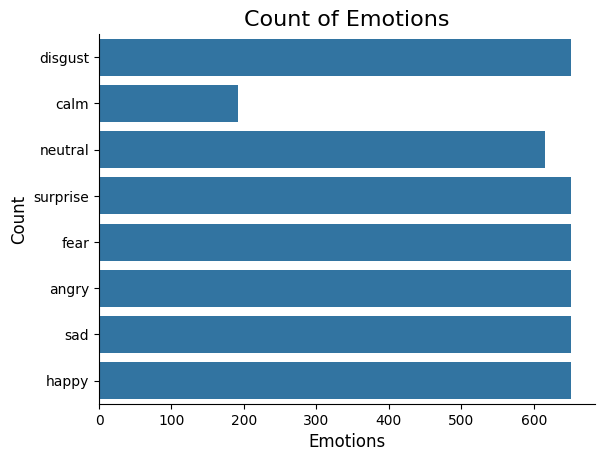

In [15]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots and spectograms ffor audio signals.

* Waveplots: Waveplots let us know the loudness of the audio at a given time.

* Spectograms: A pectogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It's a representation of frequencies changing with respect to time for given audio/music signals.

In [16]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr) # Changed waveplot to waveshow
    plt.show()

def create_spectogram(data, sr, e):
    # stft ffunction converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

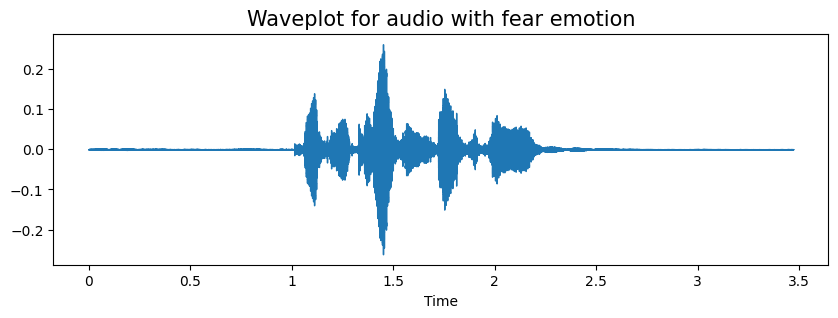

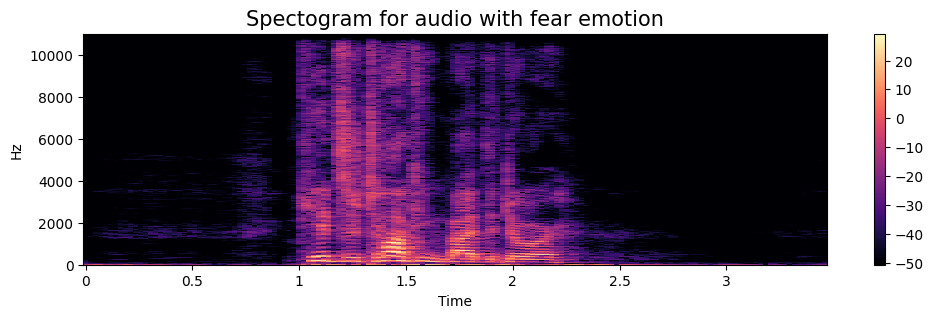

In [17]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

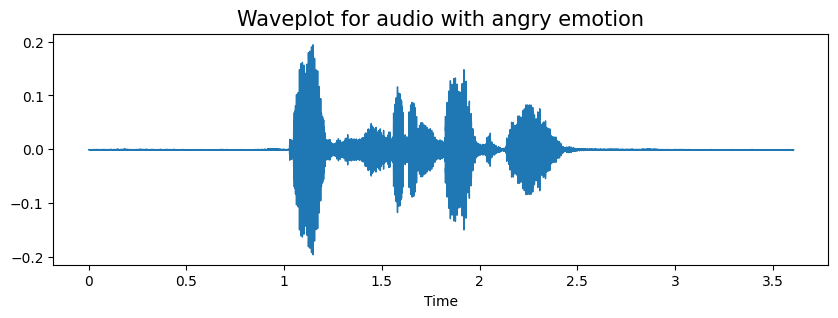

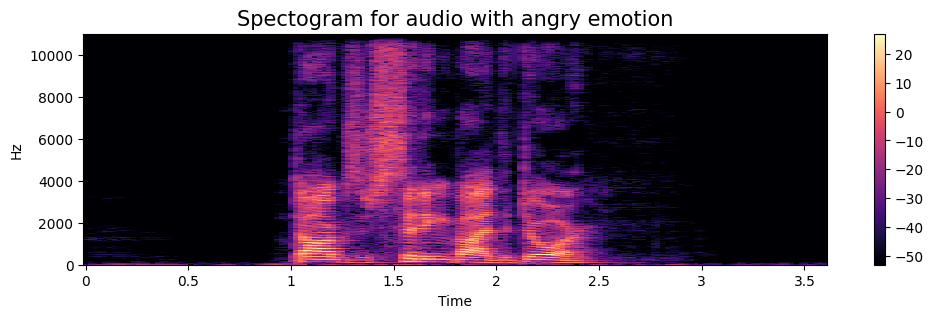

In [18]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

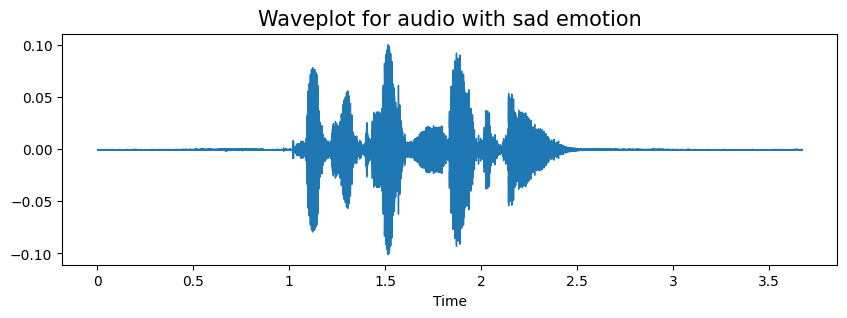

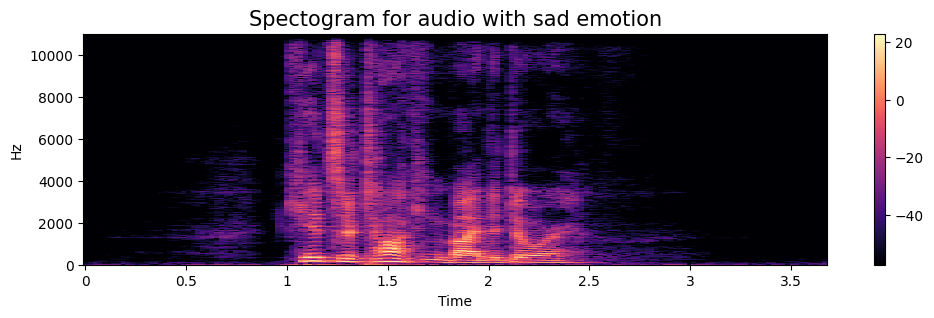

In [19]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

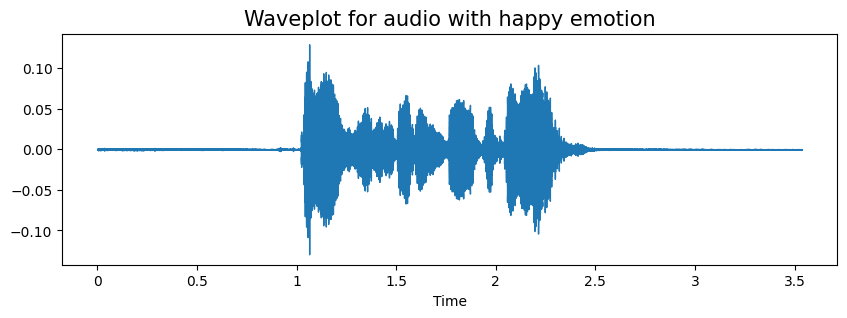

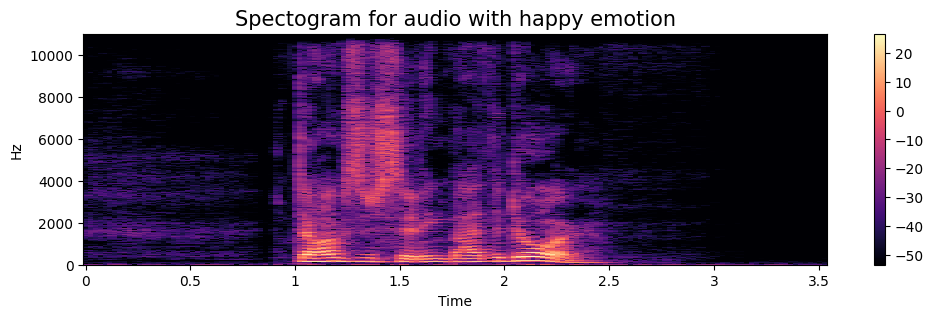

In [20]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectogram(data, sampling_rate, emotion)
Audio(path)

**Data Augmentation**

* Data Augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

* To generate syntactic data ffor audio, we can apply noiswe injection, shifting time, changing pitch and speed.

* THe objective is to mnake our model invariant to those perturbations and enhance it's ability to generalize.

* In order to this to work adding the perturbations must conserve the same label as the original training sample.

* In images data augmentation can be performed by shifting the image, zooimg, rotating etc.

First, let's check which augmentation techniques work better for our dataset.

In [21]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5)* 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

1. Simple Audio

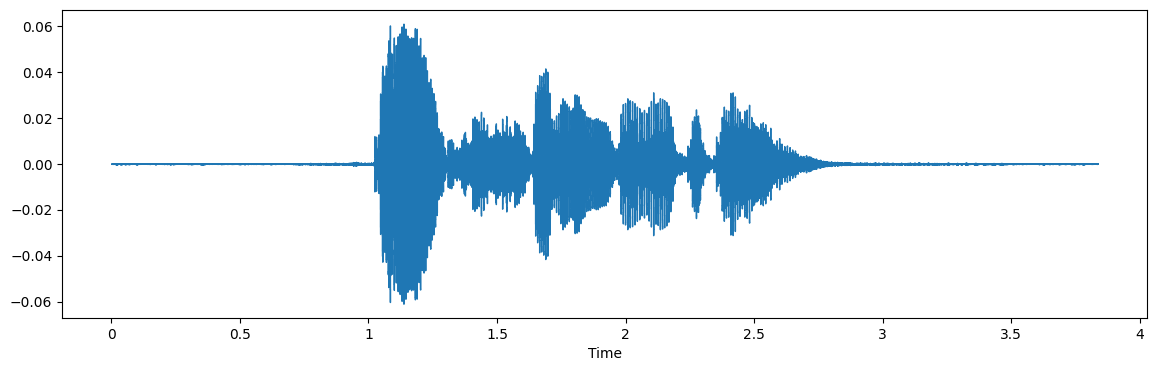

In [22]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise Injection

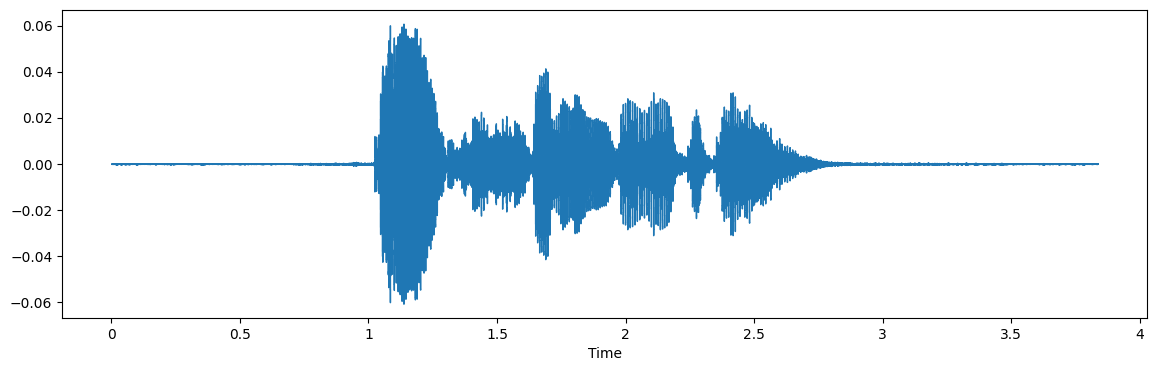

In [23]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

We can see noise injection is a very good augmentation technique because of which we can assure our training model is not overfitted.

3. Stretching

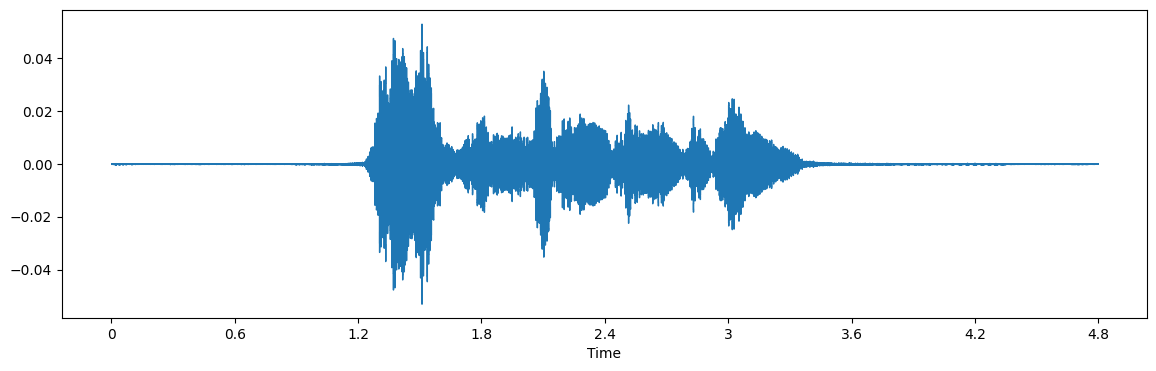

In [24]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

4. Shifting

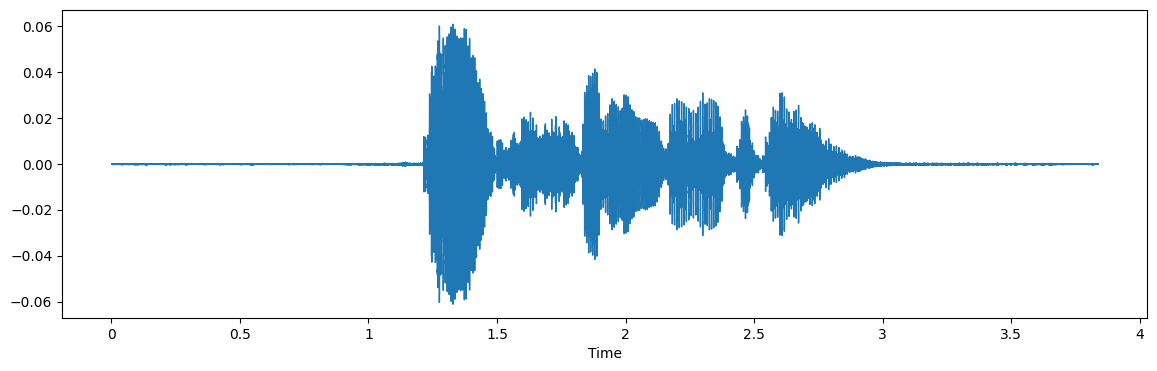

In [25]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

5. Pitch


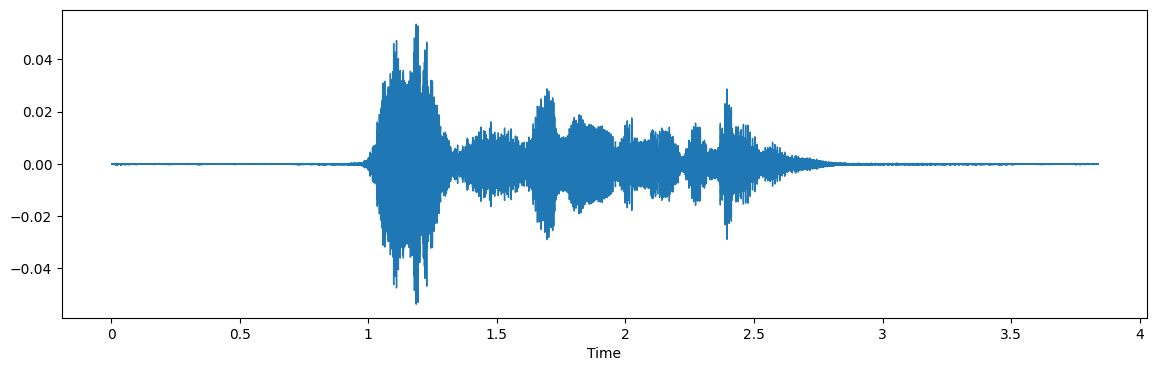

In [26]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

* From the above types of augmentation techniques I am using noise, stretching(i.e, changing speed) and some pitching.

**Feature Extraction**

* Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

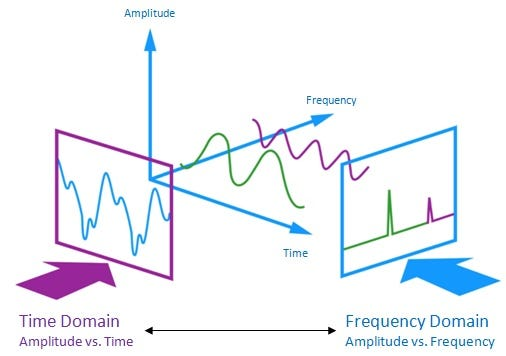

With the help of the sample rate and the sample data, one can perffrom several transformations on it to extract valuable features out of it.

1. Zero Crssoing Rate: The rate of sighn-changes of the signal during the duration of a particular frame.

2. Energy: The sum of squares of the signal values, normalized by the respective fframe length.

3. Entropy of Energy: The entropy of sub-frames normalized energies. It can be interpreted as a measure of abrupt changes,

4. Spectral Centroid: The center of gravity of the spectrum.

5. Spectral Spread: The second central moment of the spectrum.

6. Spectral Entropy: Entropy of the normalized spectral energies for a set of sub-frames.

7. Spectral Flux: The squared diffference between the normalized magnitudes of the spectra of the two successive frames.

8. Spexctral Rolloff: The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.

9. MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

10. Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).

11. Chroma Deviation : The standard deviation of the 12 chroma coefficients.

In this project i am not going deep in feature selection process to check which features are good for our dataset rather i am only extracting 5 features:

* Zero Crossing Rate
* Chroma_stft
* MFCC
* RMS(root mean square) value
* MelSpectogram to train our model

In [27]:
def extract_features(data, sample_rate):
    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)

    # Stack features horizontally
    return np.hstack((zcr, chroma_stft, mfcc, rms, mel))

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Initialize result array
    num_features = len(extract_features(data, sample_rate))
    result = np.zeros((3, num_features))

    # without augmentation
    result[0, :] = extract_features(data, sample_rate)

    # data with noise
    noise_data = noise(data)
    result[1, :] = extract_features(noise_data, sample_rate)

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    result[2, :] = extract_features(data_stretch_pitch, sample_rate)

    return result

In [28]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    X.append(feature)
    Y.append(emotion)

In [29]:
len(X), len(Y), data_path.Path.shape

(4720, 4720, (4720,))

In [33]:
import pandas as pd
import numpy as np

# Assuming X is your 3d list and Y is your list of labels
# Reshape X to 2d
X_2d = np.vstack(X)

# Repeat labels to match augmented data
Y_augmented = np.repeat(Y, 3) # Repeat each label 3 times

Features = pd.DataFrame(X_2d)
Features['labels'] = Y_augmented # Assign the augmented labels
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.153085  0.650966  0.664183  0.662659  0.650955  0.638011  0.621474   
1  0.337628  0.784443  0.798385  0.791448  0.781144  0.772484  0.750210   
2  0.138777  0.640447  0.608298  0.614947  0.637696  0.584902  0.560945   
3  0.136710  0.666323  0.661025  0.614486  0.607258  0.596225  0.564852   
4  0.266104  0.750600  0.796173  0.747149  0.734460  0.747255  0.701283   

          7         8         9  ...       153       154       155       156  \
0  0.615278  0.731192  0.788230  ...  0.000547  0.000551  0.000606  0.000500   
1  0.688182  0.725818  0.766639  ...  0.000809  0.000782  0.000833  0.000764   
2  0.564980  0.615849  0.789595  ...  0.000133  0.000107  0.000127  0.000120   
3  0.581593  0.657066  0.681605  ...  0.000046  0.000045  0.000059  0.000069   
4  0.628552  0.688836  0.716368  ...  0.000254  0.000243  0.000269  0.000283   

        157       158       159       160       161   labels  
0  0.000370  0.000318  0.000312  0.000242  0.000023  disgust  
1  0.000598  0.000544  0.000533  0.000475  0.000269  disgust  
2  0.000141  0.000114  0.000061  0.000037  0.000002  disgust  
3  0.000089  0.000109  0.000095  0.000042  0.000007     calm  
4  0.000305  0.000307  0.000307  0.000244  0.000208     calm  

[5 rows x 163 columns]

* We have applied data augmentation and extracted the features ffor each audio files amnd saved them.

**Data Preparation**

* As of now we have extracted the data, now we need to normalize and split our data ffor training and testing.

In [34]:
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

In [36]:
from sklearn.preprocessing import OneHotEncoder

# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [40]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 162), (10620, 8), (3540, 162), (3540, 8))

In [41]:
# scaling our data with sklearn's Standard Scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((10620, 162), (10620, 8), (3540, 162), (3540, 8))

In [42]:
# making our data compatible to model
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 162, 1), (10620, 8), (3540, 162, 1), (3540, 8))

**Modelling**

In [43]:
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 162, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 81, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 81, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 41, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 41, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 21, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 81s 458ms/step - accuracy: 0.2713 - loss: 1.8287 - val_accuracy: 0.4975 - val_loss: 1.3590 - learning_rate: 0.0010
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 103s 591ms/step - accuracy: 0.5007 - loss: 1.3254 - val_accuracy: 0.6506 - val_loss: 0.9808 - learning_rate: 0.0010
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 118s 446ms/step - accuracy: 0.6010 - loss: 1.0905 - val_accuracy: 0.6960 - val_loss: 0.8528 - learning_rate: 0.0010
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 119s 670ms/step - accuracy: 0.6398 - loss: 0.9839 - val_accuracy: 0.7031 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 140s 656ms/step - accuracy: 0.6752 - loss: 0.8795 - val_accuracy: 0.7308 - val_loss: 0.7440 - learning_rate: 0.0010
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 105s 436ms/step - accuracy: 0.6970 - loss: 0.8217 - val_accuracy: 0.7319 - val_loss: 0.7330 - learning_rate: 0.0010
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 82s 437ms/step - accuracy

111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8546 - loss: 0.4983
Accuracy of our model on test data :  85.73446273803711 %


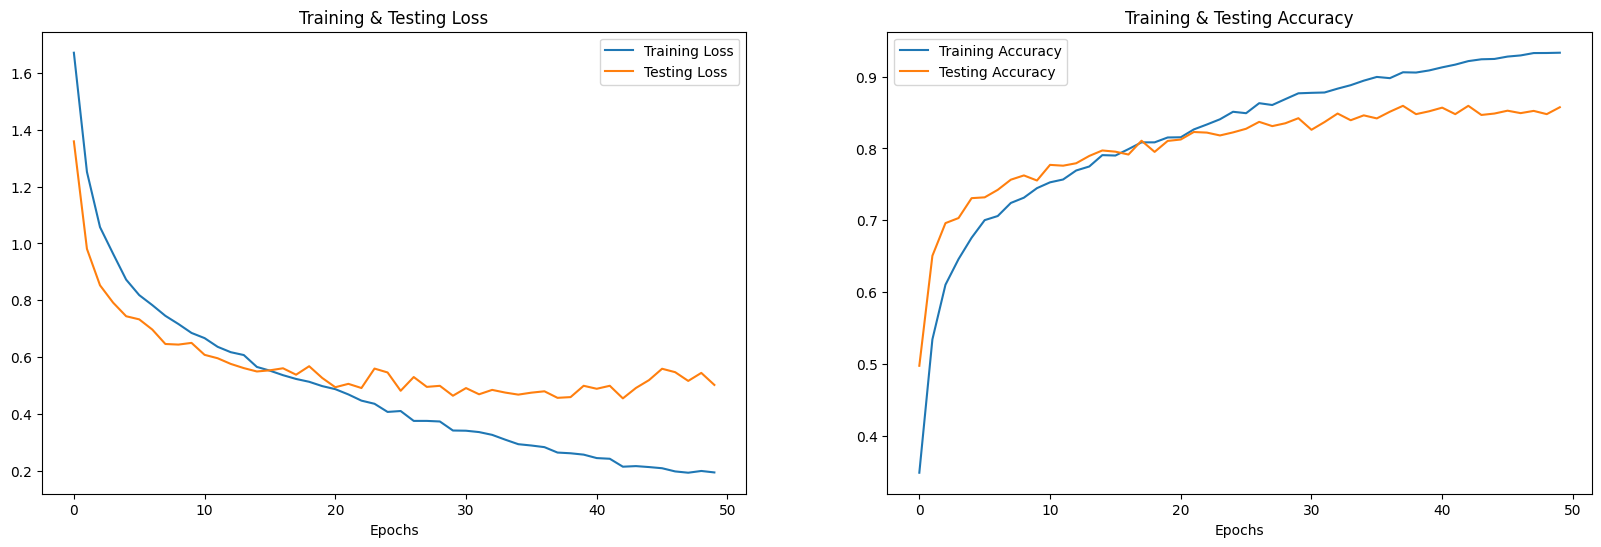

In [45]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [46]:
# predicting on test data
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


In [47]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          disgust       disgust
1          disgust       disgust
2          disgust       disgust
3         surprise      surprise
4             calm          calm
5             fear         angry
6         surprise      surprise
7            happy         happy
8         surprise      surprise
9              sad           sad

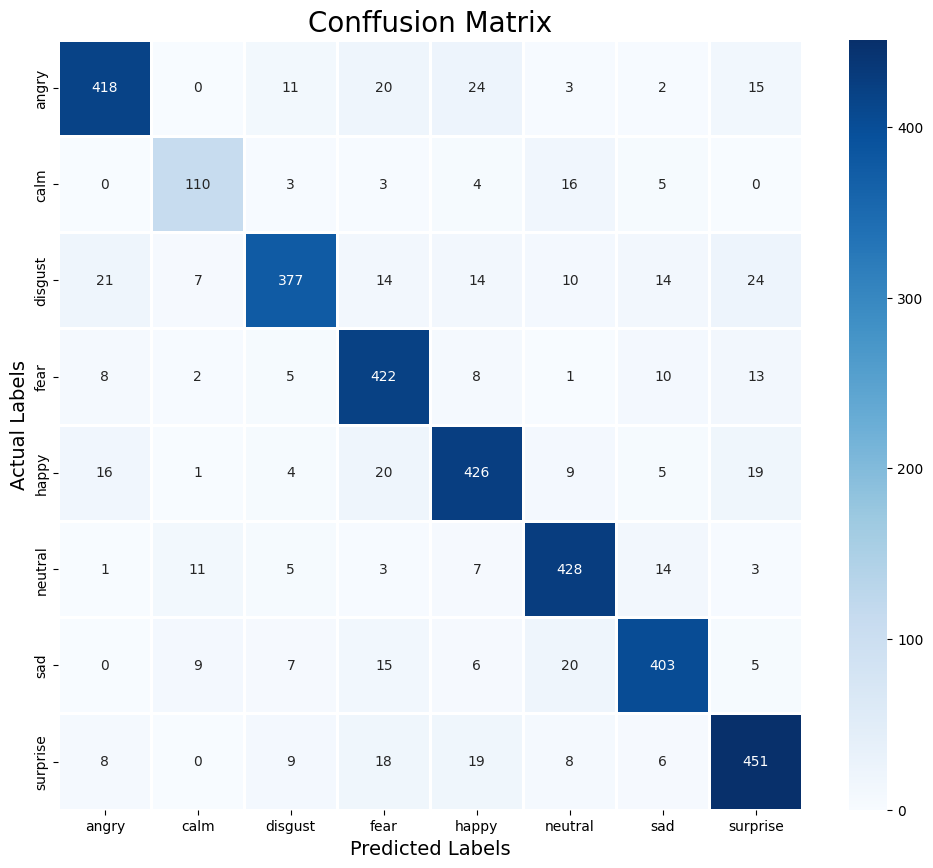

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm, index = [i for i in encoder.categories_], columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Conffusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size = 14)
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.89      0.85      0.87       493
        calm       0.79      0.78      0.78       141
     disgust       0.90      0.78      0.84       481
        fear       0.82      0.90      0.86       469
       happy       0.84      0.85      0.85       500
     neutral       0.86      0.91      0.89       472
         sad       0.88      0.87      0.87       465
    surprise       0.85      0.87      0.86       519

    accuracy                           0.86      3540
   macro avg       0.85      0.85      0.85      3540
weighted avg       0.86      0.86      0.86      3540



In [51]:
# Assuming your model is named 'model'
model.save('speech_emotion_recognition_model.keras')